# Preprocessing and modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('used_cars_India.xlsx')
df_backup=df.copy()
print(df.shape)
df.head()

In [ ]:
df.info()

### Preprocessing
* sort data by sr.no.columns
* remove columns:sr.no,New_price
* reset index

In [ ]:
df=df_backup.copy()
df.sort_values(by=df.columns[0],inplace=True)
df.drop([df.columns[0],'New_Price'],axis=1,inplace=True)
df.reset_index(inplace=True,drop=True)
df.head(10)

In [ ]:
df.info()

### Preprocessing:
* segregate the brand names.
* correct the invalid ones.

In [ ]:
df_name=df.copy()
df_name['Name']=df_name['Name'].apply(lambda s:s.split()[0])
print(df_name.Name.unique())
df_name['Name'].replace({'Land':'Land Rover','Mini':'Mini cooper','ISUZU':'Isuzu'},inplace=True)
print(df_name.Name.unique())


### Preprocessing
* remove kmpl and km/kg
* convert column data type to float

In [ ]:
df_mileage=df_name.copy()
df_mileage['Mileage']=df_mileage['Mileage'].apply(lambda s:str(s).split()[0]).astype('float')
# or
#df_mileage['Mileage']=df_mileage['Mileage'].apply(lambda s:s.split()[0] if isinstance(s,str) else s).astype('float')

#df_mileage['Mileage']=df_mileage['Mileage'].str.replace('kmpl','')
#df_mileage['Mileage']=df_mileage['Mileage'].str.replace('km/kg','')
#df_mileage['Mileage']=df_mileage['Mileage'].astype('float')
df_mep=df_mileage.copy()

df_mep['Engine']=df_mep['Engine'].apply(lambda s:str(s).split()[0]).astype('float')

df_mep['Power']=df_mep['Power'].replace('null bhp',np.nan)
df_mep['Power']=df_mep['Power'].apply(lambda s:str(s).split()[0]).astype('float')

print(df_mep.head())
df_mep.info()

### EDA: 
* check the various columns through their plots
* decide if any column has outliers
* remove outliers : replace by log_transformation or NaN
* replace by upper or lower limits


In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(data = df_mep, x = 'Name',width=0.3)
#plt.xticks(de_mep+width/2, x, rotation=30)
#plt.legend()
plt.show()

In [ ]:
sns.pairplot(df_mep)

In [3]:
sns.displot(df_mep['Year'])

NameError: name 'sns' is not defined

In [ ]:
df_mep['Year'].unique()

In [ ]:
plt.figure(figsize=(15,15))

plt.pie(df_mep.Year.value_counts(), autopct = '%.2f%%', radius = 1.1, labels = [2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],labeldistance=1.1)
plt.show()

In [ ]:
sns.countplot(data = df_mep, x ='Owner_Type',hue='Transmission')
plt.show()

In [ ]:
sns.countplot(data = df_mep, x ='Fuel_Type',hue='Owner_Type')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))

sns.countplot(data = df_mep, x ='Location')
plt.show()

### Data transformation:
* Fill na values
* convert catgorical to numerical
* do feature selection : check if you can retain only few top important features(Hint: by using p value or correlation coefficient)

In [ ]:
df_mep.isna().sum()

In [ ]:
mean_m = df_mep['Mileage'].mean()
mean_e = df_mep['Engine'].mean()
mean_p = df_mep['Power'].mean()
mean_s = df_mep['Seats'].mean()
# Fill NaN values with the respective column means
df_mep['Mileage'].fillna(mean_m, inplace=True)
df_mep['Engine'].fillna(mean_e, inplace=True)
df_mep['Power'].fillna(mean_p, inplace=True)
df_mep['Seats'].fillna(mean_s, inplace=True)
df_mep.info()

In [ ]:
df_mep.head(3)

In [ ]:
df_mep = pd.get_dummies(df_mep, columns=['Location','Fuel_Type','Transmission','Owner_Type'])
df_mep
info(pd.get_dummies())


<Axes: >

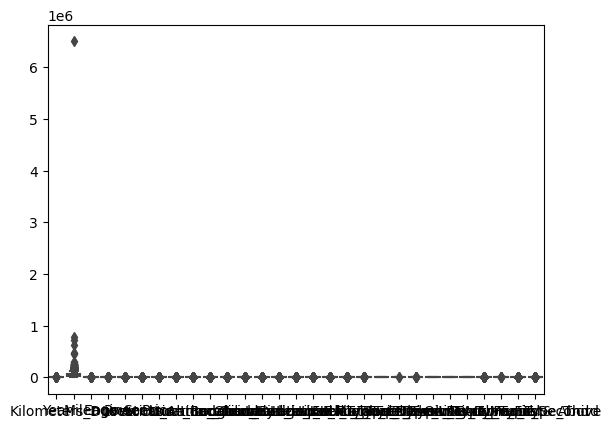

In [21]:
sns.boxplot(df_mep)

In [22]:
df_out=df_mep.copy()
df_out.head(2)

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,...,0,0,0,0,0,1,1,0,0,0
1,Hyundai,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,...,1,0,0,0,0,1,1,0,0,0


In [23]:
x=df_out.drop(['Price','Name'],axis=1,inplace=True)
x=df_out.iloc[:,0:-1]

x.head(2)

y = df_mep['Price']
y=y.iloc[:-1]
y
x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
6017,2013,46000,18.90,998.0,67.10,5.0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


<Axes: >

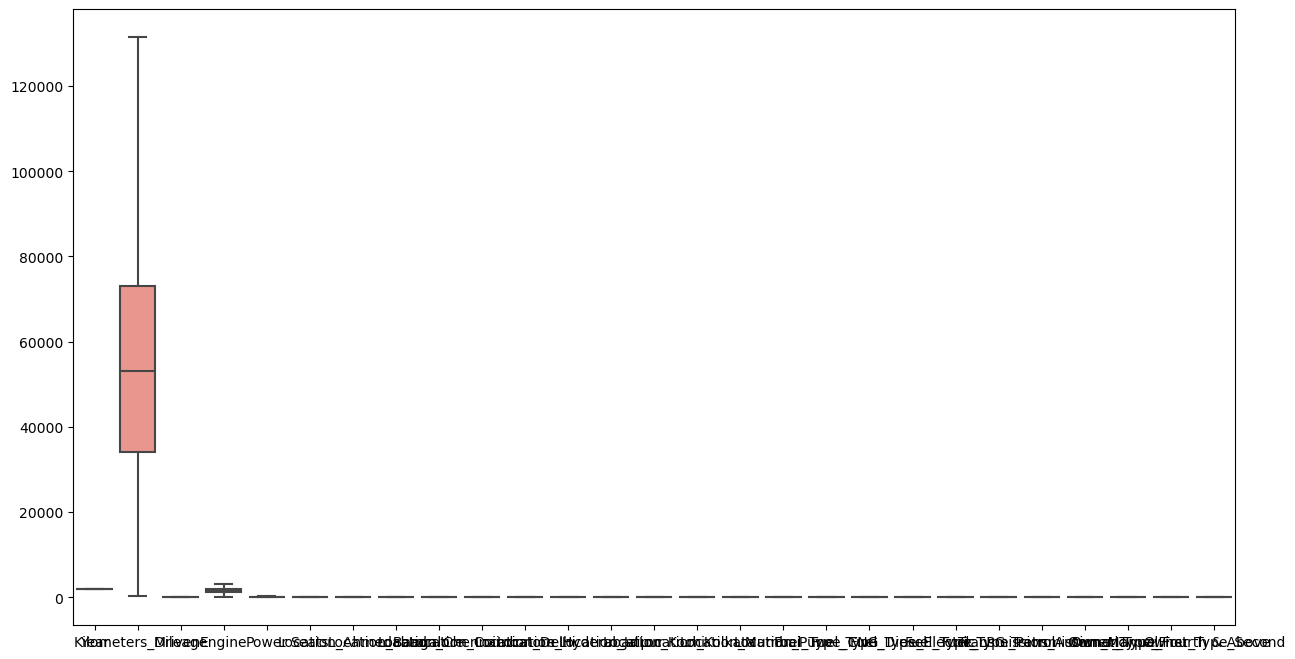

In [24]:
def remove_outliers(d):
    """
    This function removes the outliers according to the box plot.
    input: d is numerical column
    return: the same column as input by replacing outliers with upper and lower limits
    """
    Q1, Q3 = np.quantile(d,q=[0.25,0.75])
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # lower,upper
    d1 = np.where(d<lower,lower,d)
    d1 = np.where(d1>upper,upper,d1)
    return d1

col_names = x.columns

for c in col_names:
    x[c] = remove_outliers(x[c])
plt.figure(figsize=(15,8))

sns.boxplot(data=x)

In [25]:
df_mep.corr(
)

C:\Users\Sattya\AppData\Local\Temp\ipykernel_5028\1087487531.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mep.corr(


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
Year,1.000000,-0.173048,3.215336e-01,-0.051712,0.013895,0.012204,0.305327,-0.004896,-0.042806,-0.131993,...,0.126185,7.907273e-04,-0.031919,-0.127490,0.097059,-0.097059,0.373494,-0.077886,-0.297913,-0.231184
Kilometers_Driven,-0.173048,1.000000,-6.525316e-02,0.091029,0.033419,0.083072,-0.011493,-0.007559,-0.000793,0.102344,...,0.104441,-2.345021e-03,0.000549,-0.103907,-0.025663,0.025663,-0.078563,0.032659,0.062143,0.045405
Mileage,0.321534,-0.065253,1.000000e+00,-0.588354,-0.506801,-0.303086,-0.306588,0.029576,-0.077411,-0.007708,...,0.113106,3.032703e-17,0.011131,-0.143909,-0.333096,0.333096,0.151470,-0.049101,-0.122522,-0.084158
Engine,-0.051712,0.091029,-5.883536e-01,1.000000,0.859020,0.393087,0.657118,-0.011785,0.080467,0.000351,...,0.426749,-2.087046e-02,-0.040411,-0.406900,0.499082,-0.499082,-0.049160,0.019378,0.042432,0.019114
Power,0.013895,0.033419,-5.068014e-01,0.859020,1.000000,0.100200,0.767331,-0.011848,0.088377,-0.027181,...,0.288974,-1.926825e-02,-0.040880,-0.268738,0.638835,-0.638835,-0.029557,-0.004626,0.030194,0.003455
Seats,0.012204,0.083072,-3.030863e-01,0.393087,0.100200,1.000000,0.052118,-0.001261,0.016217,0.013625,...,0.307573,-6.305379e-03,-0.014109,-0.301090,-0.075250,0.075250,-0.003852,0.041454,-0.004845,0.012242
Price,0.305327,-0.011493,-3.065881e-01,0.657118,0.767331,0.052118,1.000000,-0.017964,0.086526,-0.046130,...,0.320645,5.533751e-03,-0.025499,-0.309363,0.586025,-0.586025,0.091808,-0.021445,-0.073552,-0.055297
Location_Ahmedabad,-0.004896,-0.007559,2.957566e-02,-0.011785,-0.011848,-0.001261,-0.017964,1.000000,-0.049442,-0.058789,...,0.032939,-3.584448e-03,-0.008020,-0.033823,-0.011677,0.011677,0.005846,-0.007608,0.004720,-0.027195
Location_Bangalore,-0.042806,-0.000793,-7.741145e-02,0.080467,0.088377,0.016217,0.086526,-0.049442,1.000000,-0.075196,...,0.039944,-4.584795e-03,-0.010259,-0.034309,0.064833,-0.064833,-0.113400,0.008448,0.107890,0.027321
Location_Chennai,-0.131993,0.102344,-7.707808e-03,0.000351,-0.027181,0.013625,-0.046130,-0.058789,-0.075196,1.000000,...,0.031487,2.776002e-02,-0.012198,-0.028405,-0.028359,0.028359,-0.109304,0.019759,0.068465,0.119189


C:\Users\Sattya\AppData\Local\Temp\ipykernel_5028\1286666499.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_mep.corr(), annot=True,fmt='.2f',ax=ax)  # plot the correlation coefficients as a heatmap


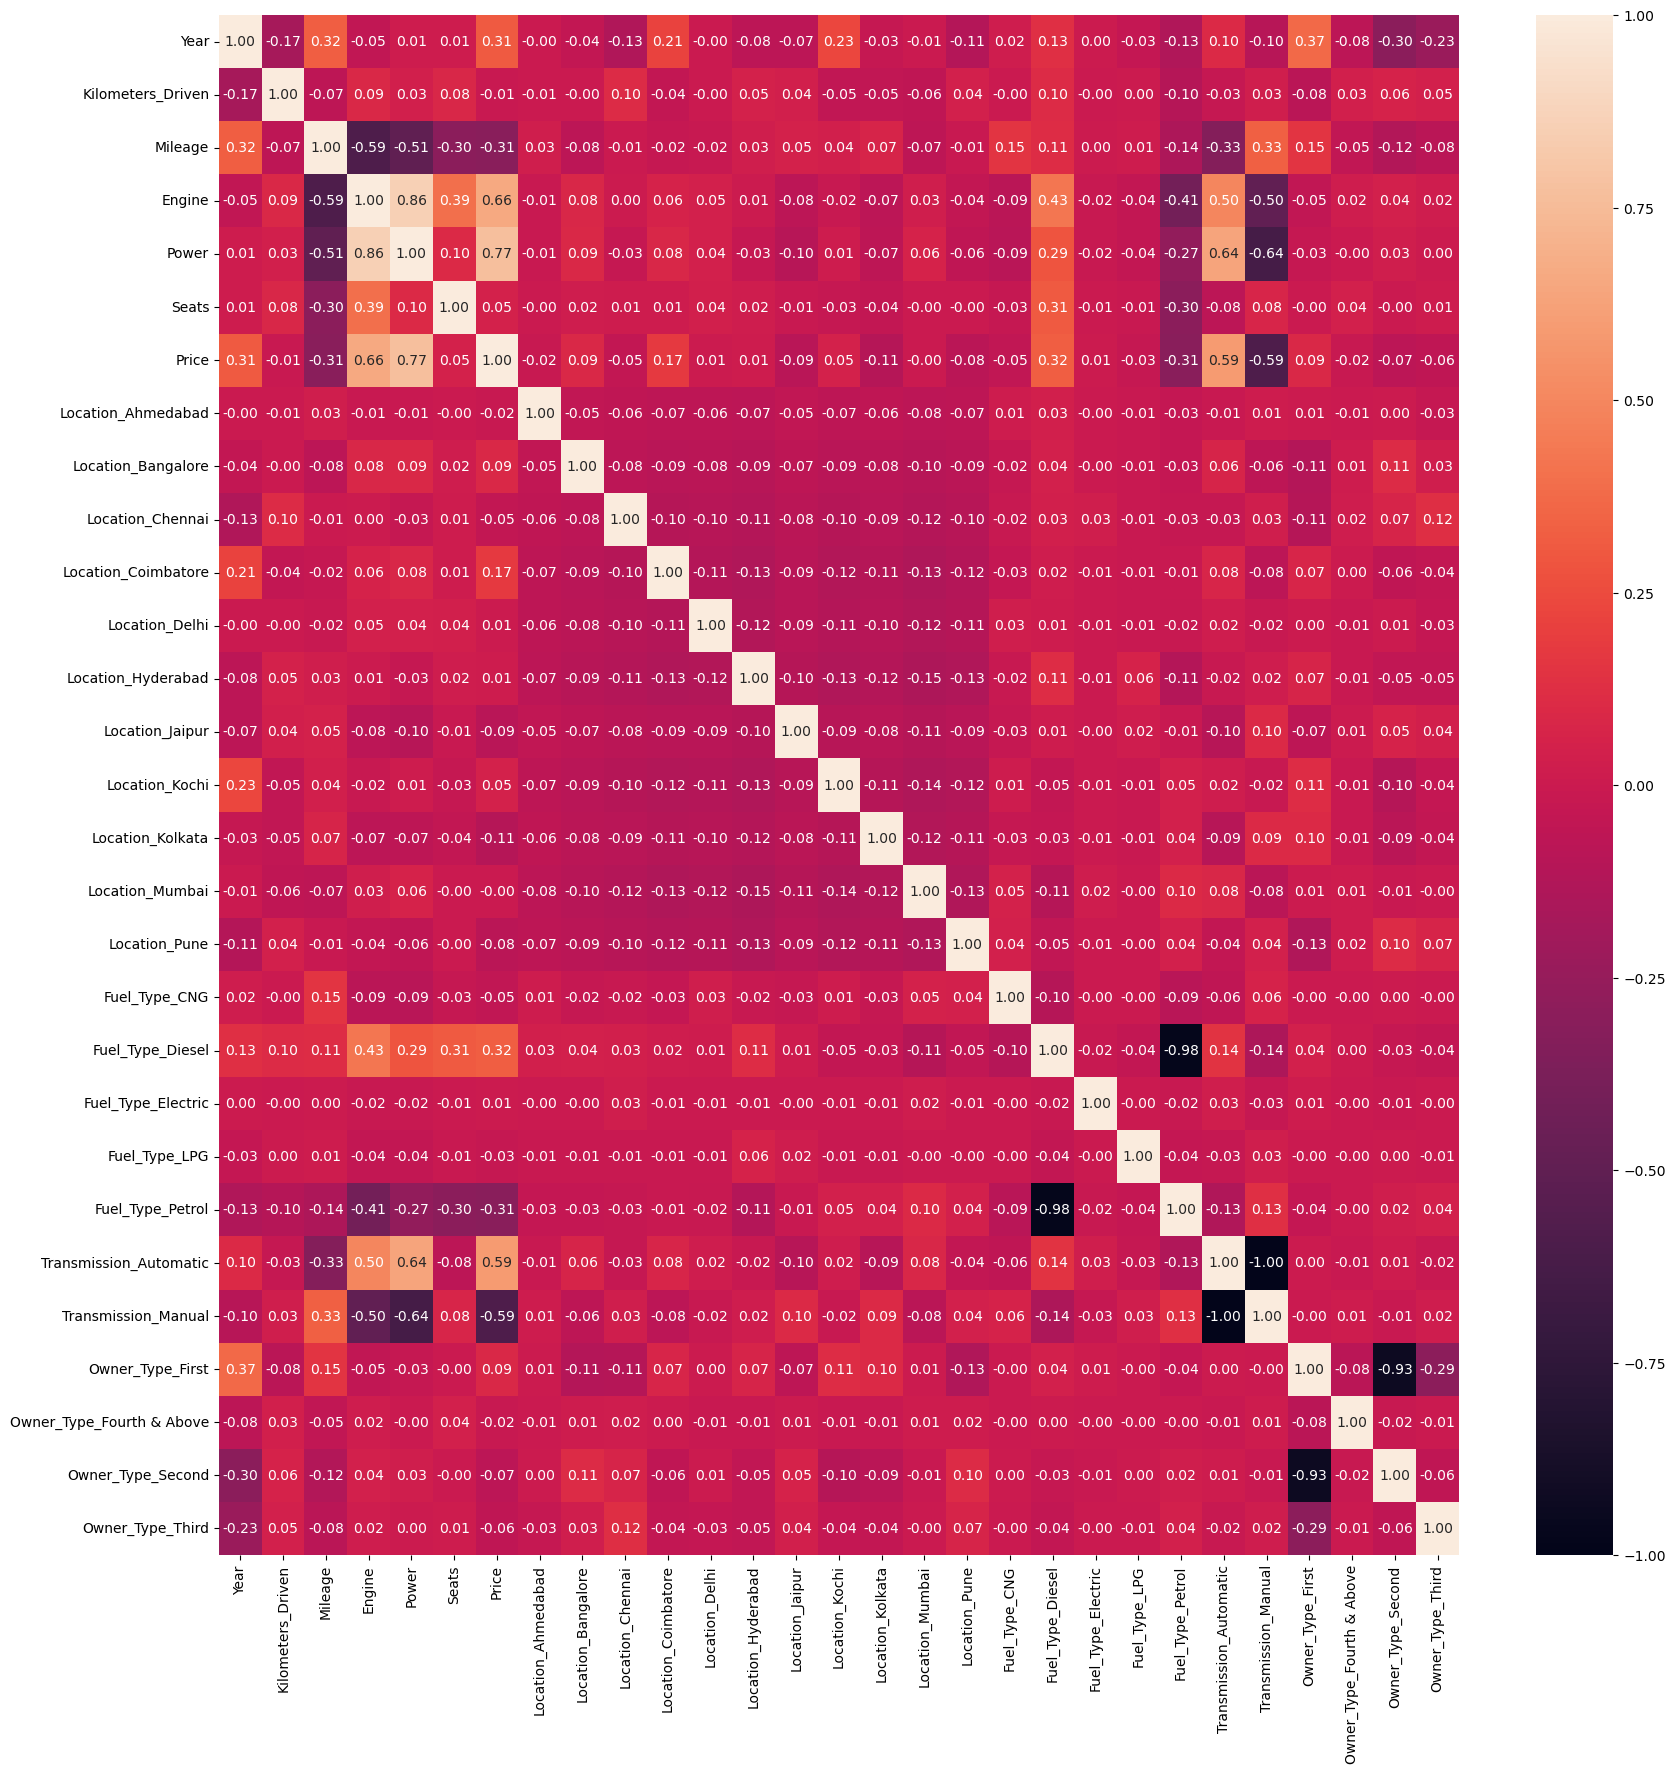

In [26]:
fig,ax=plt.subplots(figsize=(20,20)) # we can use also plt.figure(figsize=())
sns.heatmap(df_mep.corr(), annot=True,fmt='.2f',ax=ax)  # plot the correlation coefficients as a heatmap
plt.show()

In [27]:
df_feat=df_mep.copy()

correlation_matrix = df_feat.corr()

# Select the top 'k' features with the highest absolute correlation with the target
k = 10  # Change this to the desired number of top features
top_features = correlation_matrix['Price'].abs().nlargest(k).index

# Select these top features from the DataFrame
selected_features = df_feat[top_features]
selected_features

C:\Users\Sattya\AppData\Local\Temp\ipykernel_5028\2194816629.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_feat.corr()


,Price,Power,Engine,Transmission_Manual,Transmission_Automatic,Fuel_Type_Diesel,Fuel_Type_Petrol,Mileage,Year,Location_Coimbatore
0,1.75,58.16,998.0,1,0,0,0,26.60,2010,0
1,12.50,126.20,1582.0,1,0,1,0,19.67,2015,0
2,4.50,88.70,1199.0,1,0,0,1,18.20,2011,0
3,6.00,88.76,1248.0,1,0,1,0,20.77,2012,0
4,17.74,140.80,1968.0,0,1,1,0,15.20,2013,1
...,...,...,...,...,...,...,...,...,...,...
6014,4.75,74.00,1248.0,1,0,1,0,28.40,2014,0
6015,4.00,71.00,1120.0,1,0,1,0,24.40,2015,0
6016,2.90,112.00,2498.0,1,0,1,0,14.00,2012,0
6017,2.65,67.10,998.0,1,0,0,1,18.90,2013,0


In [28]:
df_mep.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [82]:
df_ols=df_mep.copy()

In [83]:
df_ols.drop(['Name','Engine','Transmission_Automatic','Fuel_Type_Diesel'],axis=1,inplace=True)

In [ ]:
df

In [84]:
import statsmodels.api as smf

target=['Price']
feature_column=df_ols.columns.difference(target)
X = df_ols[feature_column]
X = smf.add_constant(X)

# Fit the OLS model
y = df_ols[target]
model = smf.OLS(y, X).fit()

# Get the summary of the OLS regression
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     618.6
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:24:47   Log-Likelihood:                -19416.
No. Observations:                6019   AIC:                         3.888e+04
Df Residuals:                    5995   BIC:                         3.904e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [46]:
df_ols2=df_mep.copy()

In [47]:
feature_column=df_ols2.drop(['Name','Kilometers_Driven', 'Mileage', 'Engine', 'Power',
                             'Seats',  'Location_Ahmedabad', 
                             'Location_Chennai',  'Location_Delhi',
                             'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
                             'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
                             'Fuel_Type_Electric', 'Fuel_Type_LPG',
                             'Fuel_Type_Petrol', 'Transmission_Manual',
                             'Owner_Type_Fourth & Above', 'Owner_Type_Second',
                             'Owner_Type_Third'],axis=1,inplace=True)

In [48]:
import statsmodels.api as smf

target=['Price']
feature_column=df_ols2.columns.difference(target)
X = df_ols2[feature_column]
X = smf.add_constant(X)

# Fit the OLS model
y = df_ols2[target]
model = smf.OLS(y, X).fit()

# Get the summary of the OLS regression
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     857.3
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:09:54   Log-Likelihood:                -21214.
No. Observations:                6019   AIC:                         4.244e+04
Df Residuals:                    6012   BIC:                         4.249e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1436

In [62]:
df_feat=df_mep.copy()

correlation_matrix = df_feat.corr()

# Select the top 'k' features with the highest absolute correlation with the target
k = 29  # Change this to the desired number of top features
top_features = correlation_matrix['Price'].abs().nlargest(k).index

# Select these top features from the DataFrame
selected_features = df_feat[top_features]
selected_features

C:\Users\Sattya\AppData\Local\Temp\ipykernel_5028\939259386.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_feat.corr()


,Price,Power,Engine,Transmission_Manual,Transmission_Automatic,Fuel_Type_Diesel,Fuel_Type_Petrol,Mileage,Year,Location_Coimbatore,...,Fuel_Type_CNG,Location_Chennai,Fuel_Type_LPG,Owner_Type_Fourth & Above,Location_Ahmedabad,Kilometers_Driven,Location_Hyderabad,Location_Delhi,Fuel_Type_Electric,Location_Mumbai
0,1.75,58.16,998.0,1,0,0,0,26.60,2010,0,...,1,0,0,0,0,72000,0,0,0,1
1,12.50,126.20,1582.0,1,0,1,0,19.67,2015,0,...,0,0,0,0,0,41000,0,0,0,0
2,4.50,88.70,1199.0,1,0,0,1,18.20,2011,0,...,0,1,0,0,0,46000,0,0,0,0
3,6.00,88.76,1248.0,1,0,1,0,20.77,2012,0,...,0,1,0,0,0,87000,0,0,0,0
4,17.74,140.80,1968.0,0,1,1,0,15.20,2013,1,...,0,0,0,0,0,40670,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4.75,74.00,1248.0,1,0,1,0,28.40,2014,0,...,0,0,0,0,0,27365,0,1,0,0
6015,4.00,71.00,1120.0,1,0,1,0,24.40,2015,0,...,0,0,0,0,0,100000,0,0,0,0
6016,2.90,112.00,2498.0,1,0,1,0,14.00,2012,0,...,0,0,0,0,0,55000,0,0,0,0
6017,2.65,67.10,998.0,1,0,0,1,18.90,2013,0,...,0,0,0,0,0,46000,0,0,0,0


In [63]:
import statsmodels.api as smf

target=['Price']
feature_column=selected_features.columns.difference(target)
X = selected_features[feature_column]
X = smf.add_constant(X)

# Fit the OLS model
y = selected_features[target]
model = smf.OLS(y, X).fit()

# Get the summary of the OLS regression
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     594.2
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:14:42   Log-Likelihood:                -19410.
No. Observations:                6019   AIC:                         3.887e+04
Df Residuals:                    5994   BIC:                         3.904e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 